In [1]:
!pip install tensorflow-addons
!pip install --upgrade tensorflow
!pip install --upgrade scikit-learn
!pip install -U keras-tuner


Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0rc2)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.2.post1)
     |████████████████████████████████| 61kB 1.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=26aaf91520f1510f5c31b2ffc2cbe048f34c50ad37e862785cb8076b7f27610d
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=88650f87106b1df6a9e218bb60dac239a457d0105b1bd31bff18c36fbe20277e
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout,Embedding,LSTM,Bidirectional,Flatten,Conv1D,Reshape, TimeDistributed,Reshape,Activation,Dot,MaxPool1D,GlobalMaxPool1D,GRU,concatenate,GlobalAveragePooling1D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files
from google.colab import drive
from numpy import array
from numpy import asarray
from numpy import zeros
from numpy import random as random
import keras
import keras.backend as K
import gensim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')
uploaded = files.upload()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
f = '/content/drive/My Drive/sadTextv3 - sadTextv3.csv'
df = pd.read_csv(f, sep=',', error_bad_lines=False)
df = df[df['text'].notnull()]

In [0]:
df["text"] = df["text"].str.lower()
input_sentences = [text.split(" ") for text in df["text"].values.tolist()]
labels = df["emotion"].values.tolist()

In [6]:
word2id=dict()
label2id=dict()
max_words = 0

for sentence in input_sentences:
  for word in sentence:
    word = word.replace(".","")
    if word not in word2id:
      word2id[word] = len(word2id)

    if len(sentence) > max_words:
      max_words = len(sentence)

label2id = {l: i for i, l in enumerate(set(labels))}
id2label = {v:k for k, v in label2id.items()}
id2label


{0: 'disappointment',
 1: 'suffering',
 2: 'sadness',
 3: 'shame',
 4: 'sympathy',
 5: 'neglect'}

In [7]:
#Encoding Sentences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
Y = [label2id[label] for label in labels]
t = Tokenizer()
t.fit_on_texts(input_sentences)
vocab_size = len(t.word_index)+1
print(vocab_size)

encoded_data = t.texts_to_sequences(input_sentences)
padded_data = pad_sequences(encoded_data, max_words)
Y = to_categorical(Y, num_classes=len(label2id), dtype='float32')
print("Shape of X: {}".format(padded_data.shape))
print("Shape of Y: {}".format(Y.shape))
print(t.word_index)

2008
Shape of X: (878, 57)
Shape of Y: (878, 6)
{'i': 1, 'to': 2, 'and': 3, 'my': 4, 'the': 5, 'me': 6, 'a': 7, 'of': 8, 'that': 9, 'it': 10, 'but': 11, 'just': 12, 'in': 13, 'for': 14, 'is': 15, 'have': 16, 'feel': 17, 'this': 18, 'like': 19, 'so': 20, 'you': 21, 'with': 22, 'was': 23, "i'm": 24, 'not': 25, 'be': 26, 'want': 27, 'all': 28, 'im': 29, 'no': 30, 'life': 31, 'do': 32, 'about': 33, 'even': 34, 'myself': 35, 'how': 36, 'because': 37, 'or': 38, 'dont': 39, 'time': 40, 'now': 41, 'at': 42, "don't": 43, 'on': 44, 'never': 45, 'can': 46, 'he': 47, 'when': 48, 'they': 49, 'know': 50, 'really': 51, 'am': 52, 'as': 53, 'people': 54, 'being': 55, 'her': 56, 'if': 57, 'would': 58, 'out': 59, 'one': 60, 'get': 61, 'had': 62, 'from': 63, "can't": 64, 'we': 65, 'been': 66, 'depression': 67, 'up': 68, 'what': 69, 'its': 70, 'she': 71, 'much': 72, 'only': 73, 'are': 74, 'anything': 75, 'could': 76, 'them': 77, 'nothing': 78, 'alone': 79, 'cant': 80, 'has': 81, 'help': 82, 'him': 83, 'mor

In [8]:
from google.colab import drive
from numpy import array
from numpy import asarray
from numpy import zeros
#Loading embedding file into memory
print('Indexing word vectors.')

embeddings_index = {}
f = open('/content/drive/My Drive/glove.6B/glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = vec
f.close()

print('Found %s word vectors.' % len(embeddings_index))


Indexing word vectors.
Found 400000 word vectors.


In [0]:
embedding_matrix  = zeros((vocab_size,300))
for word, i in t.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector


Building a model for use with Keras Tuner

Keras Tuner can cause strange bugs such as val_acc not changing when running models. It's best to restart the instance after using it


In [9]:
'''import kerastuner as kt

def build_tuner_model(hp):

  embedding_dim = 300
  
  inputs=Input(shape=(max_words,))
  x = inputs
  x = Embedding(vocab_size,embedding_dim, weights=[embedding_matrix],input_length=max_words,trainable=False)(x)
  
  x = Bidirectional((LSTM(hp.Int('lstmunits',100,300,step=50),activation='tanh',return_sequences = True)))(x)

  a = Dense(1,activation='tanh')(x)
  a = Activation('softmax', name='attention_vec')(x)
  av = Dot(axes=1)([x, a])

  x = Dropout(hp.Float('dropout',0.1,0.5,step=0.1,default=0.5))(av)

  x = Flatten()(x)
  x = Dense(hp.Int('fc units',100,200,step=10, default=100), activation='relu')(x)
  x = Dropout(hp.Float('dropout2', 0.1, 0.5, step=0.1, default=0.5))(x)
  outputs = Dense(len(label2id), activation = 'softmax')(x)

  model = Model(inputs = [inputs], outputs=outputs)
  model.compile(optimizer=tf.keras.optimizers.Adam(
                hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model''

SyntaxError: ignored

Function defining a functional keras model

In [0]:

def createmodel():
  embedding_dim = 300

  inputs=Input(shape=(max_words,),dtype='int32')


  xx = Embedding(vocab_size,embedding_dim, weights=[embedding_matrix],input_length=max_words,trainable=True)(inputs)
  xx = Dropout(0.1)(xx)

  xx = Bidirectional((LSTM(300,activation='tanh',return_sequences = True)))(xx)

  av = Dense(1,activation='tanh')(xx)
  av = Activation('softmax', name='attention_vec')(av)
  aa = Dot(axes=1)([xx, av])
  
  xx = Flatten()(aa)
  fc = Dense(100, activation='relu')(xx)
  out = Dense(len(label2id), activation = 'softmax')(fc)

  model = Model(inputs = [inputs], outputs = out)
  model.compile(optimizer=tf.keras.optimizers.Adam(0.004370187549970498),
                loss='categorical_crossentropy',
                metrics=['accuracy',tf.keras.metrics.Recall(),
                        tf.keras.metrics.Precision(),])
  model.summary()

  return model

In [0]:
#Callbacks
def scheduler(epoch):
  if epoch < 20:
    return 0.001
  else:
    return 0.001 * tf.math.exp(0.1 * (10 - epoch))

best_epoch = 'weights.{epoch:02d}-{val_accuracy:.2f}.hdf5'
checkpoint =  tf.keras.callbacks.ModelCheckpoint(filepath=best_epoch, monitor='val_accuracy',save_best_only=True,mode='max')
scheduler_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode="max")
callbacks = [earlystop,checkpoint]


In [0]:
test_split = 650
X_train=padded_data[:test_split]
Y_train=Y[:test_split]
X_test=padded_data[test_split+1:]
Y_test=Y[test_split+1:] 

Hyperband Tuning.Skip this if parameters are already tuned

In [0]:
'''tuner = kt.Hyperband(
    build_tuner_model,
    objective='val_accuracy',
    max_epochs=30,
    hyperband_iterations=10,
    project_name='test1')
'''

In [0]:
'''tuner.search(X_train,Y_train,
             validation_split=0.5,
             shuffle = True,
             epochs=30,
             callbacks=[earlystop])
'''

In [0]:
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print(best_hyperparameters)

Real model training.

In [24]:
model = createmodel()
history = model.fit(X_train,Y_train, epochs=100, batch_size=32, validation_split=0.2, shuffle=True, callbacks=callbacks)


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 57)]         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 57, 300)      602400      input_4[0][0]                    
__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 57, 300)      0           embedding_3[0][0]                
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 57, 600)      1442400     dropout_4[0][0]                  
____________________________________________________________________________________________

In [0]:
#converting Y_test from one hot encoding for sklearn classification_report
Y_onehot = Y_test.tolist()
Y_true=[]

for items in Y_onehot:
  i=0
  for item in items: 
    if item == 1:
      Y_true.append(i)
      
    else:
      i+=1

In [26]:
#Loading the weights from the best epoch
model.load_weights('/content/weights.21-0.40.hdf5')

preds=model.predict(X_test, batch_size=32, verbose=1)
pred_classes = np.argmax(preds,axis=1)
labels = ['sadness','disappointment','suffering','shame','neglect','sympathy']
print(classification_report(Y_true,pred_classes,labels=[0,1,2,3,4,5],target_names=labels,digits=4))

8/8 [==============================] - 1s 112ms/step
                precision    recall  f1-score   support

       sadness     0.2308    0.4839    0.3125        31
disappointment     0.3214    0.5625    0.4091        32
     suffering     0.0000    0.0000    0.0000        29
         shame     0.2308    0.0612    0.0968        49
       neglect     0.3636    0.4286    0.3934        28
      sympathy     0.5814    0.4310    0.4950        58

      accuracy                         0.3216       227
     macro avg     0.2880    0.3279    0.2845       227
  weighted avg     0.3200    0.3216    0.2963       227



In [0]:
tf.keras.utils.plot_model(createmodel(), show_shapes=True, show_layer_names=True, to_file='model.png')

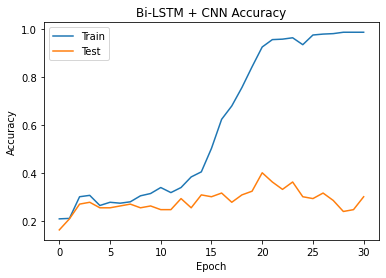

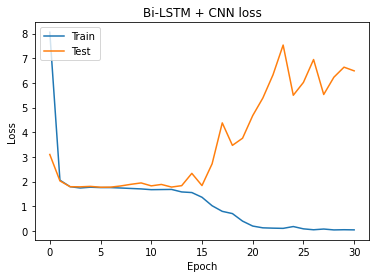

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Bi-LSTM + CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Bi-LSTM + CNN loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [30]:


newpreds = [id2label[item] for item in pred_classes]
print(len(newpreds))
print(len(labels[test_split+1:]))
text=df["text"][test_split+1:].tolist()
print(len(text))
data = {'Text':text, 'Classification':labels[test_split+1:], 'Prediction': newpreds} 
newdf = pd.DataFrame(data)
newdf.to_csv("predscnn.csv")

227
227
227
